# Quiz Exercise - Linear Regression

### Problem Statement

MedicaInsure is a medical insurance provider. Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, analysis of customer attributes like age, sex, smoking habits, etc. can be crucial in making decisions regarding the premium amount to be charged.


### Attribute information

    age: age of the policyholder
    sex: gender of the policyholder
    bmi: Body Mass Index of the policyholder
    children: number of children of the policyholder
    smoker: whether the policyholder is a smoker or not
    region: region where the policyholder belongs to
    charges: premium charged to the policyholder



Kindly go through these guidelines before you attempt the quiz:

    Use random_state=1 wherever this parameter can be used.
    Ensure there is a proper internet connection while taking up the quiz. Any breakup in the connection will automatically submit your quiz.
    Only attempt the quiz when you are prepared and have enough time on your hands to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
    The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
    No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
    If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.



### Import Necessary Libraries

In [4]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

### Load the dataset

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/UseCases/ML_Insurance_Provider/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check the shape of the dataset

In [7]:
df.shape

(1338, 7)

### Get the info regarding column datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Get summary statistics for the numerical columns

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

In [13]:
# let's plot all the columns to look at their distributions

import seaborn as sns

# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



### Age

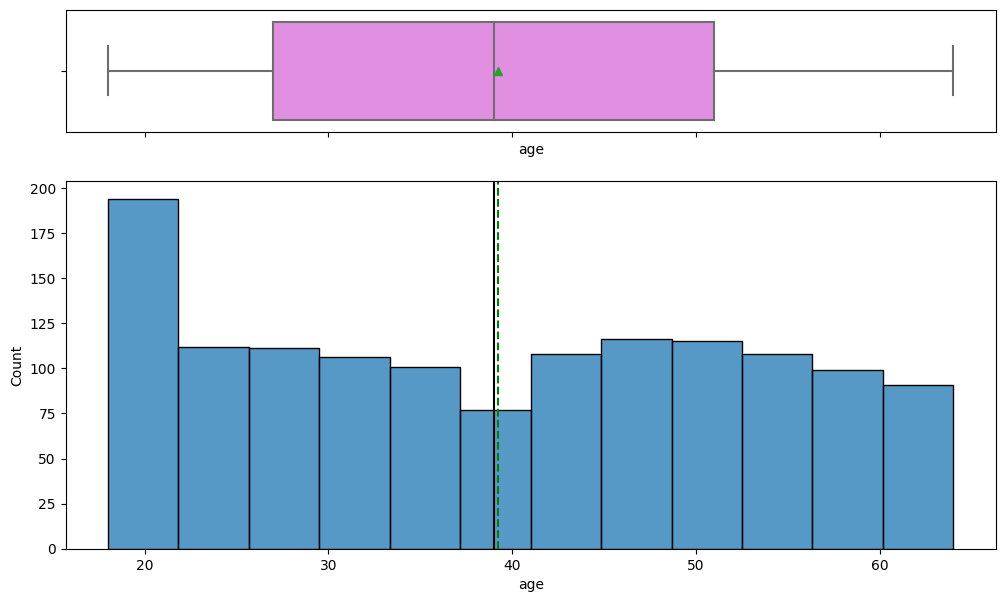

In [14]:
histogram_boxplot(df, "age")

#intdTypes = df.select_dtypes(include=['float64', 'int64'])

#for i in intdTypes.columns:
#    plt.figure(figsize=(7, 4))
#    sns.histplot(data=df, x=i)
#    plt.show()

* Most of the policy holders are of age 40 years old


### BMI

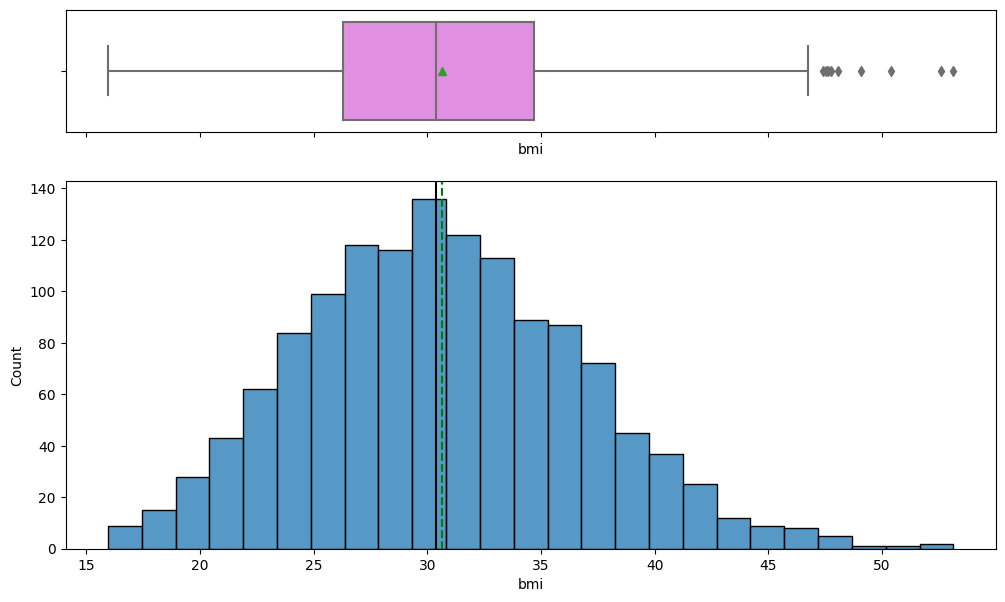

In [15]:
histogram_boxplot(df, "bmi")


* BMI is evenly distrubuted and its 30

### Children

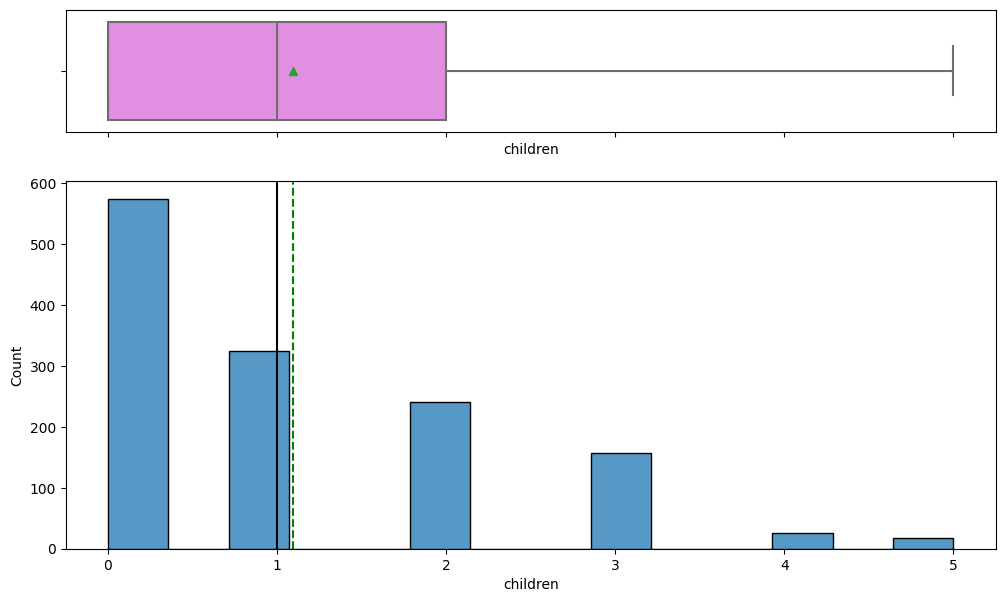

In [16]:
histogram_boxplot(df, "children")


- Most of the policy holders has one children

###Charges

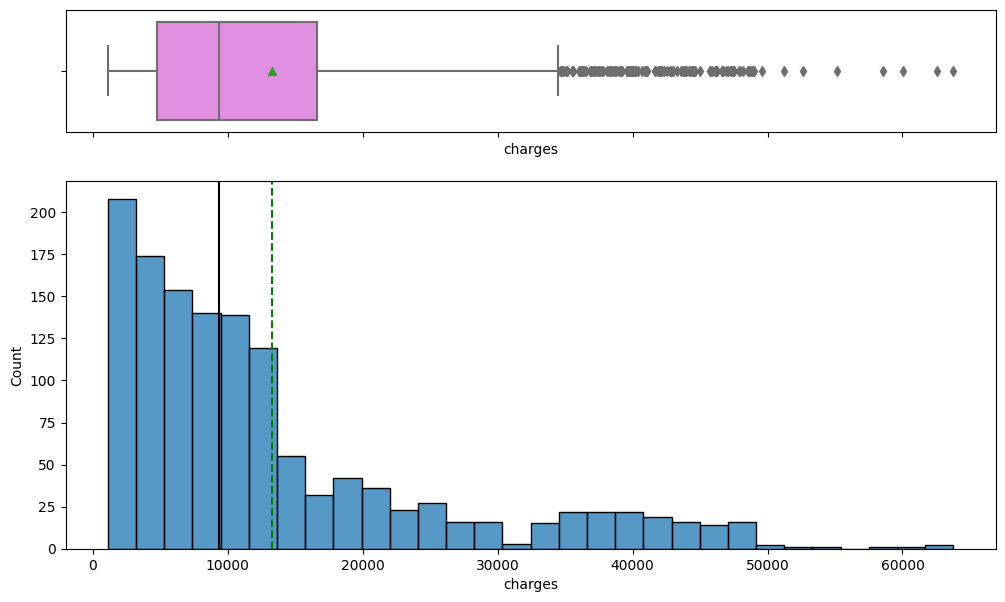

In [17]:
histogram_boxplot(df, "charges")


- Average charges for the olicyholder is $13300

**Plot the correlation heatmap and list your observations.**

<ipython-input-18-d207b7d46160>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


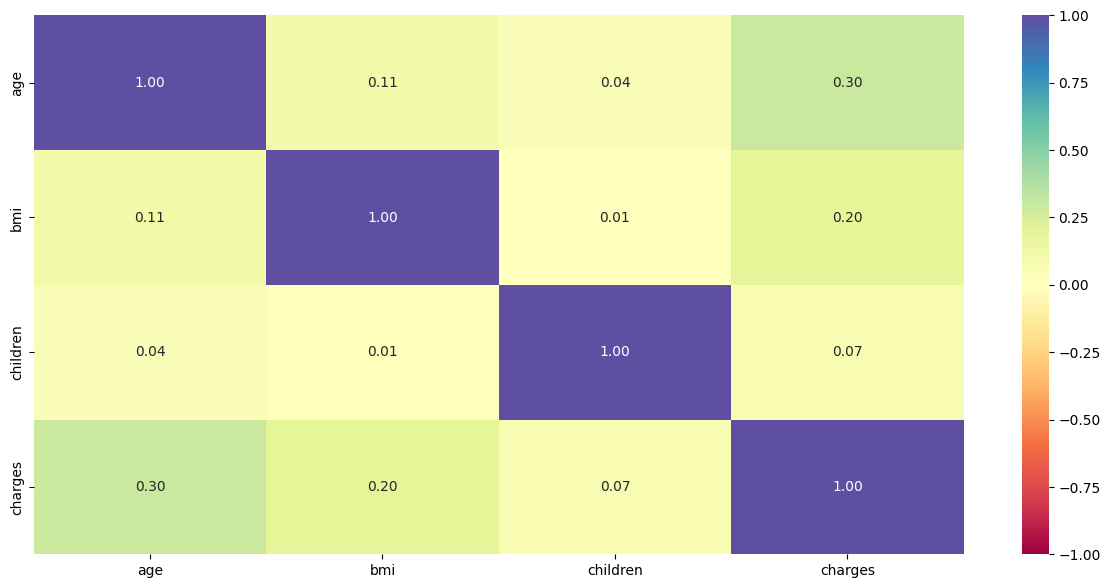

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Charges are more for the older aged policy holders who has more BMI

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [36]:
X = df.drop(["charges"], axis=1)
y = df["charges"]

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [38]:
X.shape

(1338, 8)

In [49]:
X = df.drop(["bmi"], axis=1)
y = df["bmi"]

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

,age,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,0,1,0,0,1
1,18,1,1725.55230,1,0,0,1,0
2,28,3,4449.46200,1,0,0,1,0
3,33,0,21984.47061,1,0,1,0,0
4,32,0,3866.85520,1,0,1,0,0


In [50]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 936
Number of rows in test data = 402


### Model Building (sklearn)

**Fit the model to the training set**

In [51]:
# intialize the model to be fit and fit the model on the train data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [52]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
    regression_model.score(X_train, y_train),
)

The score (R-squared) on the training set is  0.1730534045985742


**Write your own function for the R-squared score.**

In [53]:
def r_squared(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(X)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  28657.476532348188
SST:  34654.56740702457
R-squared:  0.1730534045985742


**Get the score on test set**

In [54]:
# get the score (R-squared) on the test set

print(
    "The score (R-squared) on the test set is ", regression_model.score(X_test, y_test)
)

The score (R-squared) on the test set is  0.20267952316659432


**Get the MAE**

In [80]:

# Import the necessary library to obtain MAE

from sklearn.metrics import mean_absolute_error
# to build linear regression_model
from sklearn.linear_model import LinearRegression

lr_sklearn = LinearRegression()
lr_sklearn.fit(X_test, y_test)

# Making predictions on the test set
y_test_pred = lr_sklearn.predict(X_test)
# lr is the linear regression model here.
# Obtaining MAE

MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f"The Mean Adbsolute Error for Test data is {MAE_test} ")


The Mean Adbsolute Error for Test data is 4.236629683198747 


**Get the RMSE on train set**

In [55]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  5.53325962767062


**Get the RMSE on test set**

In [56]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  5.466146576480836


**Get the model coefficients.**

In [57]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
age,-0.019839
children,-0.089882
charges,0.000271
sex_male,0.580584
smoker_yes,-6.519423
region_northwest,0.427926
region_southeast,4.160514
region_southwest,1.751838
Intercept,27.352681


**Automate the equation of the fit**

In [58]:
# Let us write the equation of linear regression

Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print(
            "+ (",
            regression_model.coef_[i],
            ")*(",
            X_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", regression_model.coef_[i], ")*(", X_train.columns[i], ")")

Price = 27.352680521264624 + ( -0.01983877689474667 )*( age )  + ( -0.08988208866186716 )*( children )  + ( 0.00027059877969071167 )*( charges )  + ( 0.5805841503583804 )*( sex_male )  + ( -6.519422543317125 )*( smoker_yes )  + ( 0.42792633286257253 )*( region_northwest )  + ( 4.160513568877917 )*( region_southeast )  + ( 1.751837935102047 )*( region_southwest )


In [60]:
# Build

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import operator

interaction_term = PolynomialFeatures(degree=2, interaction_only=True)
interaction_term

PolynomialFeatures(interaction_only=True)

In [67]:
X_train_poly_two = interaction_term.fit_transform(X_train)
X_train_poly_two

array([[ 1., 50.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  1., ...,  0.,  0.,  0.],
       [ 1., 25.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1., 51.,  2., ...,  0.,  0.,  0.],
       [ 1., 40.,  2., ...,  0.,  0.,  0.],
       [ 1., 57.,  1., ...,  0.,  0.,  0.]])

In [68]:
# to build linear regression_model
from sklearn.linear_model import LinearRegression

model_two_degree_train = LinearRegression()
model_two_degree_train.fit(X_train_poly_two, y_train)

#y_train_poly_pred_two = model_two_degree_train.predict(model_two_degree_train)

LinearRegression()

In [70]:
model_two_degree_train.score(X_train_poly_two, y_train)

0.1716618660168212

In [87]:
y_train_pred_two = model_two_degree_train.predict(X_train_poly_two)

In [88]:
rmse_two_train = np.sqrt(mean_squared_error(y_train,y_train_pred_two))
r2_two_train = r2_score(y_train,y_train_pred_two)
print('RMSE DEGREE 2 for Train Data', rmse_two)
print('R2 DEGREE 2 for Train Data', r2_two)

RMSE DEGREE 2 for Train Data 6.063857535998864
R2 DEGREE 2 for Train Data 0.018775575213509477


In [82]:
## Score for Polynominal

# Build

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import operator

interaction_term = PolynomialFeatures(degree=2, interaction_only=True)
interaction_term

PolynomialFeatures(interaction_only=True)

In [83]:
# Get the transformed Fit for test data

X_test_poly_two = interaction_term.fit_transform(X_test)


In [84]:
# to build linear regression_model
from sklearn.linear_model import LinearRegression

model_two_degree_test = LinearRegression()
model_two_degree_test.fit(X_test_poly_two, y_test)


LinearRegression()

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_poly_pred_two = model_two_degree_test.predict(X_test_poly_two)


In [86]:
rmse_two = np.sqrt(mean_squared_error(y_test,y_test_poly_pred_two))
r2_two = r2_score(y_test,y_test_poly_pred_two)
print('RMSE DEGREE 3', rmse_two)
print('R2 DEGREE 3', r2_two)

RMSE DEGREE 3 6.063857535998864
R2 DEGREE 3 0.018775575213509477
